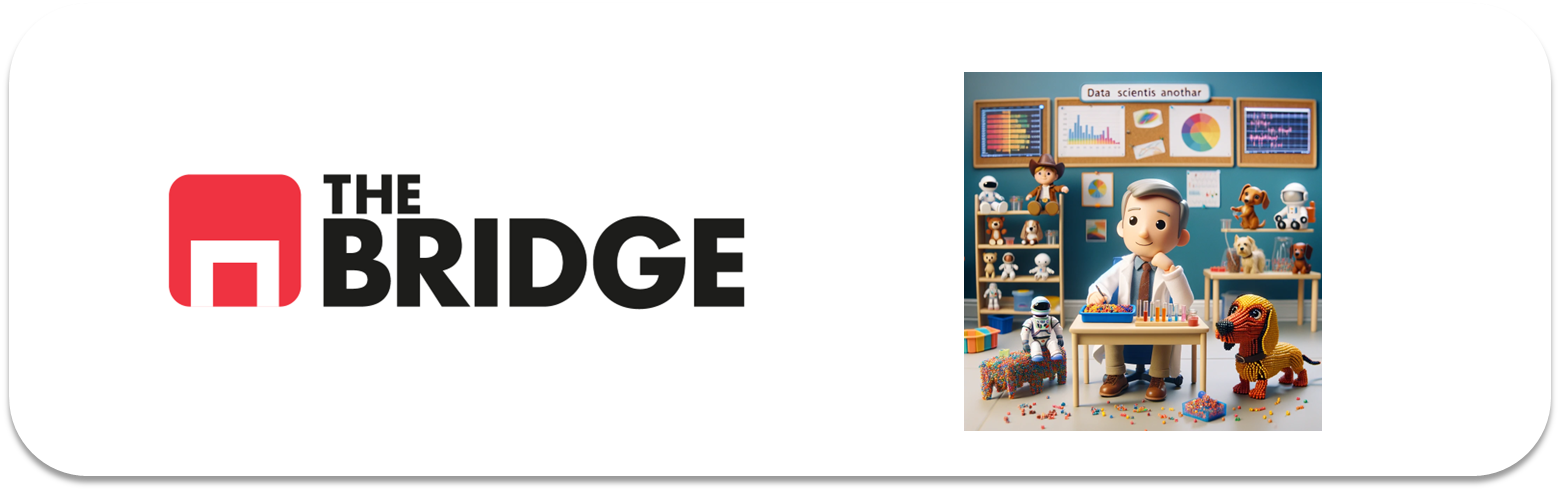

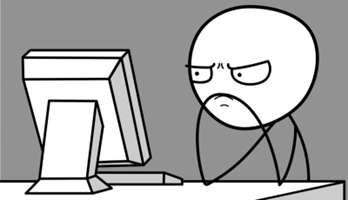

Para ejercitarte y afianzar lo aprendido sobre primeros pasos en el análisis de un dataset, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
# Importación de paquetes básicos para análisis de datos
import pandas as pd   # Para manipulación y análisis de datos
import numpy as np    # Para cálculos matemáticos y manejo de matrices

# Importación de herramientas de visualización
import matplotlib.pyplot as plt   # Para gráficos básicos
import seaborn as sns             # Para visualización avanzada y atractiva

# Importación de herramientas para estadísticas y manejo de datos
from scipy import stats           # Para análisis estadísticos

# Configuración de los gráficos
plt.style.use('ggplot')           # Estilo de gráficos
sns.set_theme()                   # Establecer el tema de Seaborn

# Configuración de pandas para mostrar más columnas y filas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Importaciones completadas.")# Importación de paquetes básicos para análisis de datos
import pandas as pd   # Para manipulación y análisis de datos
import numpy as np    # Para cálculos matemáticos y manejo de matrices

# Importación de herramientas de visualización
import matplotlib.pyplot as plt   # Para gráficos básicos
import seaborn as sns             # Para visualización avanzada y atractiva

# Importación de herramientas para estadísticas y manejo de datos
from scipy import stats           # Para análisis estadísticos

# Configuración de los gráficos
plt.style.use('ggplot')           # Estilo de gráficos
sns.set_theme()                   # Establecer el tema de Seaborn

# Configuración de pandas para mostrar más columnas y filas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Importaciones completadas.")

Importaciones completadas.
Importaciones completadas.


### Ejercicio 1

Crea una función `cardinalidad` que admita tres argumentos: un dataframe (`df_in`), un entero (`umbral_categoria`) y un float (`umbral_continua`). La función debe devolver otro dataframe con la cardinalidad (como valores diferntes) de cada columna del dataframe pasado por argumento, la cardinalidad como porcentaje de valores diferntes y una valoración de si la columna del dataframe original debería considerarse binaria, categórica, numérica discreta o numérica contínua. Para ello:
+ Si la cardinalidad es 2, asignara "Binaria"
+ Si la cardinalidad es menor que `umbral_categoria` asignara "Categórica"
+ Si la cardinalidad es mayor o igual que `umbral_categoria`, entonces entra en juego el tercer argumento:
    * Si además el porcentaje de cardinalidad es superior o igual a `umbral_continua`, asigna "Numerica Continua"
    * En caso contrario, asigna "Numerica Discreta"


In [9]:


def cardinalidad(df_in, umbral_categoria, umbral_continua):
    """
    Calcula la cardinalidad de las columnas de un dataframe y clasifica cada columna en:
    Binaria, Categórica, Numérica Discreta o Numérica Continua.

    Args:
        df_in (pd.DataFrame): DataFrame de entrada.
        umbral_categoria (int): Umbral para definir una columna como categórica.
        umbral_continua (float): Umbral de porcentaje para definir una columna como numérica continua.

    Returns:
        pd.DataFrame: DataFrame con las columnas:
            - Columna: Nombre de la columna.
            - Cardinalidad: Número de valores únicos en la columna.
            - Porcentaje: Porcentaje de valores únicos respecto al total.
            - Clasificación: Tipo de columna (Binaria, Categórica, Numérica Discreta, Numérica Continua).
    """
    # Lista para almacenar los resultados
    resultados = []

    # Iterar sobre las columnas del DataFrame
    for columna in df_in.columns:
        valores_unicos = df_in[columna].nunique()  # Cardinalidad: número de valores únicos
        porcentaje = valores_unicos / len(df_in)  # Porcentaje de valores únicos

        # Clasificación de la columna
        if valores_unicos == 2:
            clasificacion = "Binaria"
        elif valores_unicos < umbral_categoria:
            clasificacion = "Categórica"
        elif porcentaje >= umbral_continua:
            clasificacion = "Numérica Continua"
        else:
            clasificacion = "Numérica Discreta"

        # Agregar resultados a la lista
        resultados.append({
            "Columna": columna,
            "Cardinalidad": valores_unicos,
            "Porcentaje": porcentaje,
            "Clasificación": clasificacion
        })

    # Convertir la lista de resultados en un DataFrame
    df_resultados = pd.DataFrame(resultados)

    return df_resultados


### Ejercicio 2

Carga en un dataframe los datos contenidos en la ruta "./data/admission_data.csv", muestra un parte de su contenido y la info general del mismo

In [10]:




# Ruta del archivo
ruta_archivo = r"C:\Users\hp\Desktop\Python Scripts\admission_data.csv"

# Cargar el archivo en un DataFrame
try:
    df_admission = pd.read_csv(ruta_archivo)
    print("Archivo cargado correctamente:")
    print(df_admission.head())  # Muestra las primeras filas del DataFrame
except Exception as e:
    print(f"Error al cargar el archivo: {e}")

Archivo cargado correctamente:
   Unnamed: 0  Year                    Major Gender Admission
0           0  1973       School of Medicine      F  Rejected
1           1  1973  Department of Economics      M  Accepted
2           2  1973                    Other      F  Accepted
3           3  1973                    Other      M  Accepted
4           4  1973                    Other      M  Rejected


### Ejercicio 3

Rellen las dos primeras columnas de la siguiente tabla con tu mejor criterio:


|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|Col1|Se trata de la variable que mide x...|||||






In [14]:
# Cargar el archivo en un DataFrame
df_admision = pd.read_csv(ruta_archivo)

# Guardar el DataFrame para usos futuros
df_admision.to_csv("df_admision_guardado.csv", index=False)

# Crear un DataFrame con las dos primeras columnas (Columna/Variable y Descripción)
tabla_descripcion = pd.DataFrame({
    "Columna/Variable": df_admision.columns,
    "Descripción": [
        "Descripción de qué mide la columna (modificar según corresponda)"
        for _ in df_admision.columns
    ]
})

# Mostrar la tabla de descripción con estilo
print("Tabla de descripción con estilo:")
display(
    tabla_descripcion.style.set_table_styles([
        {"selector": "thead th", "props": [("background-color", "#4CAF50"), ("color", "white"), ("text-align", "center")]},
        {"selector": "tbody td", "props": [("border", "1px solid #ddd"), ("text-align", "left")]}
    ])
)

# Mostrar el DataFrame cargado con estilo
print("\nDataFrame cargado con estilo:")
display(
    df_admision.style.set_table_styles([
        {"selector": "thead th", "props": [("background-color", "#4CAF50"), ("color", "white"), ("text-align", "center")]},
        {"selector": "tbody td", "props": [("border", "1px solid #ddd"), ("text-align", "center")]}
    ])
)

Tabla de descripción con estilo:



DataFrame cargado con estilo:


### Ejercicio 4

Con ayuda de la función del ejercicio 1, completa la tercera columna (Tipo de Variable)

In [ ]:
# Cargar el archivo en un DataFrame
df_admision = pd.read_csv(ruta_archivo)

# Función del Ejercicio 1
def cardinalidad(df_in, umbral_categoria, umbral_continua):
    resultados = []
    for columna in df_in.columns:
        valores_unicos = df_in[columna].nunique()
        porcentaje = valores_unicos / len(df_in) * 100

        if valores_unicos == 2:
            clasificacion = "Binaria"
        elif valores_unicos < umbral_categoria:
            clasificacion = "Categórica"
        elif porcentaje >= umbral_continua:
            clasificacion = "Numérica Continua"
        else:
            clasificacion = "Numérica Discreta"

        resultados.append({
            "Columna": columna,
            "Cardinalidad": valores_unicos,
            "Porcentaje": porcentaje,
            "Clasificación": clasificacion
        })

    # Definir DataFrame para guardar los resultados
    df_resultados = pd.DataFrame(resultados)
    return df_resultados

# Aplicar la función al DataFrame
df_resultados = cardinalidad(df_admision, umbral_categoria=10, umbral_continua=20)

# Crear la tabla de descripción y completar la tercera columna
tabla_descripcion = pd.DataFrame({
    "Columna/Variable": df_admision.columns,
    "Descripción": [
        "Descripción de qué mide la columna (modificar según corresponda)"
        for _ in df_admision.columns
    ],
    "Tipo de Variable": df_resultados["Clasificación"]
})

# Mostrar la tabla de descripción con estilo
print("Tabla de descripción actualizada:")
display(
    tabla_descripcion.style.set_table_styles([
        {"selector": "thead th", "props": [("background-color", "#4CAF50"), ("color", "white"), ("text-align", "center")]},
        {"selector": "tbody td", "props": [("border", "1px solid #ddd"), ("text-align", "left")]}
    ])
)



Tabla de descripción actualizada:


In [29]:
# Confirmar la existencia de tabla_descripcion, convertir a DataFrame si es necesario, y agregar "Tipo de Variable"
if 'tabla_descripcion' in locals() or 'tabla_descripcion' in globals():
    # Si no es un DataFrame, convertirla
    if not isinstance(tabla_descripcion, pd.DataFrame):
        tabla_descripcion = pd.DataFrame(tabla_descripcion)
    
    # Agregar la columna "Tipo de Variable" con datos ficticios (o ajusta según tu criterio)
    tabla_descripcion["Tipo de Variable"] = [
        "Numérica Continua", 
        "Categórica", 
        "Categórica", 
        "Binaria", 
        "Binaria"
    ]
    
    # Aplicar estilo al DataFrame
    tabla_styled = (
        tabla_descripcion.style.set_table_styles(
            [
                {"selector": "thead th", "props": [("background-color", "#4CAF50"), ("color", "white"), ("text-align", "center")]},
                {"selector": "tbody td", "props": [("text-align", "center"), ("border", "1px solid #ddd")]},
            ]
        ).set_properties(
            **{"background-color": "#f9f9f9", "border": "1px solid #ddd"}
        )
    )
    
    # Mostrar el DataFrame estilizado
    display(tabla_styled)
else:
    print("La tabla 'tabla_descripcion' no está definida. Por favor, verifica tu código.")

### Ejercicio 5

Si el objetivo es analizar la posible discriminación en las admisiones de los departamentos universitarios, completa las otras dos columnas con la importancia que le darías y lo que crees que deberías saber extra en el campo Nota

In [22]:
# Asegurarse de que la tabla descripción existe y es un DataFrame
if 'tabla_descripcion' in locals() or 'tabla_descripcion' in globals():
    if not isinstance(tabla_descripcion, pd.DataFrame):
        tabla_descripcion = pd.DataFrame(tabla_descripcion)
else:
    raise ValueError("La tabla 'tabla_descripcion' no está definida. Por favor, verifica tu código.")

# Agregar las columnas de "Importancia" y "Nota"
tabla_descripcion["Importancia"] = [
    "Alta",  # Ejemplo de valoración para cada columna, ajustar según corresponda
    "Alta",
    "Media",
    "Baja",
    "Alta"
]

tabla_descripcion["Nota"] = [
    "Crucial para evaluar si hay sesgos de género",  # Ejemplo de notas para cada columna
    "Indica desempeño académico",
    "Puede ser útil para entender sesgos en la selección",
    "Verificar su impacto en la evaluación",
    "Información demográfica clave"
]

# Aplicar estilo al DataFrame
tabla_styled = (
    tabla_descripcion.style.set_table_styles(
        [
            {"selector": "thead th", "props": [("background-color", "#4CAF50"), ("color", "white"), ("text-align", "center")]},
            {"selector": "tbody td", "props": [("text-align", "center"), ("border", "1px solid #ddd")]},
        ]
    ).set_properties(
        **{"background-color": "#f9f9f9", "border": "1px solid #ddd"}
    )
)

# Mostrar el DataFrame estilizado
display(tabla_styled)

### Ejercicio 6

Carga en un dataframe el fichero con ruta "./data/tips.csv", muestra parte de su contenido y la información general del mismo.

In [24]:
# Cargar el archivo tips.csv en un DataFrame
ruta_tips = r"C:\Users\hp\Desktop\Python Scripts\tips.csv"  # Ajustar la ruta según tu sistema
df_tips = pd.read_csv(ruta_tips)

# Mostrar las primeras filas del DataFrame
print("Primeras filas del DataFrame:")
print(df_tips.head())

# Mostrar información general del DataFrame
print("\nInformación general del DataFrame:")
print(df_tips.info())

# Mostrar el DataFrame con estilo
df_tips_styled = (
    df_tips.head().style.set_table_styles(
        [
            {"selector": "thead th", "props": [("background-color", "#4CAF50"), ("color", "white"), ("text-align", "center")]},
            {"selector": "tbody td", "props": [("text-align", "center"), ("border", "1px solid #ddd")]},
        ]
    ).set_properties(
        **{"background-color": "#f9f9f9", "border": "1px solid #ddd"}
    )
)

# Mostrar el DataFrame estilizado (en entornos compatibles)
display(df_tips_styled)

Primeras filas del DataFrame:
   Unnamed: 0  total_bill   tip     sex smoker  day    time  size
0           0       16.99  1.01  Female     No  Sun  Dinner     2
1           1       10.34  1.66    Male     No  Sun  Dinner     3
2           2       21.01  3.50    Male     No  Sun  Dinner     3
3           3       23.68  3.31    Male     No  Sun  Dinner     2
4           4       24.59  3.61  Female     No  Sun  Dinner     4

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int6

In [26]:
df_tips

Unnamed: 0  total_bill   tip     sex smoker   day    time  size
0             0       16.99  1.01  Female     No   Sun  Dinner     2
1             1       10.34  1.66    Male     No   Sun  Dinner     3
2             2       21.01  3.50    Male     No   Sun  Dinner     3
3             3       23.68  3.31    Male     No   Sun  Dinner     2
4             4       24.59  3.61  Female     No   Sun  Dinner     4
..          ...         ...   ...     ...    ...   ...     ...   ...
239         239       29.03  5.92    Male     No   Sat  Dinner     3
240         240       27.18  2.00  Female    Yes   Sat  Dinner     2
241         241       22.67  2.00    Male    Yes   Sat  Dinner     2
242         242       17.82  1.75    Male     No   Sat  Dinner     2
243         243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 8 columns]

### Ejercicio 7

Rellen las dos primeras columnas de la siguiente tabla con tu mejor criterio considerando el dataset anterior:


|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|Col1|Se trata de la variable que mide x...|||||

In [28]:
# Crear DataFrame con las columnas necesarias y sus descripciones
tabla_tips = pd.DataFrame({
    "Columna/Variable": df_tips.columns,
    "Descripción": [
        "Número de identificación del registro",
        "Monto total de la cuenta",
        "Propina dejada por el cliente",
        "Género del cliente (Masculino/Femenino)",
        "Cliente es fumador (Sí/No)",
        "Día de la semana de la visita",
        "Momento del día (Almuerzo/Cena)",
        "Tamaño del grupo de clientes"
    ],
    "Tipo_de_Variable": [
        "Numérica Discreta", 
        "Numérica Continua", 
        "Numérica Continua", 
        "Categórica", 
        "Binaria", 
        "Categórica", 
        "Categórica", 
        "Numérica Discreta"
    ],
    "Importancia inicial": [
        "Baja", 
        "Alta", 
        "Alta", 
        "Media", 
        "Media", 
        "Media", 
        "Baja", 
        "Media"
    ],
    "Nota": [
        "Puede no ser relevante para el análisis",
        "Información clave para analizar consumo",
        "Esencial para analizar comportamiento de propinas",
        "Posible influencia en comportamiento de propinas",
        "Podría estar asociado a otros factores del cliente",
        "Podría influir en el comportamiento del cliente",
        "Podría influir dependiendo del contexto",
        "Útil para evaluar impacto del tamaño del grupo"
    ]
})

# Estilizar el DataFrame
tabla_styled = (
    tabla_tips.style.set_table_styles(
        [
            {"selector": "thead th", "props": [("background-color", "#4CAF50"), ("color", "white"), ("text-align", "center")]},
            {"selector": "tbody td", "props": [("text-align", "center"), ("border", "1px solid #ddd")]},
        ]
    ).set_properties(
        **{"background-color": "#f9f9f9", "border": "1px solid #ddd"}
    )
)

# Mostrar el DataFrame estilizado
tabla_styled

### Ejercicio 8

Con ayuda de la función del ejercicio 1, completa la tercera columna (Tipo de Variable)

In [30]:
# Configuración de umbrales
umbral_categoria = 10  # Define un valor para el umbral categórico
umbral_continua = 0.05  # Define un porcentaje para el umbral de continua

# Aplicar la función 'cardinalidad' al DataFrame df_tips
df_resultados_cardinalidad = cardinalidad(df_tips, umbral_categoria, umbral_continua)

# Crear la tabla descripción con las columnas relevantes
tabla_descripcion = pd.DataFrame({
    "Columna/Variable": df_tips.columns,
    "Descripción": [
        "Identificador único de la fila",
        "Monto total de la factura",
        "Monto de la propina",
        "Sexo del cliente",
        "Si el cliente fuma",
        "Día de la semana",
        "Momento del día",
        "Tamaño del grupo"
    ],
    "Tipo_de_Variable": df_resultados_cardinalidad["Clasificación"]  # Utilizamos la clasificación generada por la función
})

# Aplicar estilo al DataFrame
tabla_styled = (
    tabla_descripcion.style.set_table_styles(
        [
            {"selector": "thead th", "props": [("background-color", "#4CAF50"), ("color", "white"), ("text-align", "center")]},
            {"selector": "tbody td", "props": [("text-align", "center"), ("border", "1px solid #ddd")]},
        ]
    ).set_properties(
        **{"background-color": "#f9f9f9", "border": "1px solid #ddd"}
    )
)

# Mostrar el DataFrame estilizado
display(tabla_styled)

### Ejercicio 9

Si el objetivo es analizar las propinas ingresadas en un establecimiento comercial, completa las otras dos columnas con la importancia que le darías y lo que crees que deberías saber extra en el campo Nota

In [31]:
# Actualizar tabla_descripcion agregando las columnas "Importancia inicial" y "Nota"
tabla_descripcion["Importancia inicial"] = [
    "Alta" if col == "tip" else "Media" if col in ["total_bill", "size"] else "Baja"
    for col in tabla_descripcion["Columna/Variable"]
]

tabla_descripcion["Nota"] = [
    "Variable objetivo: queremos entender qué afecta a las propinas" if col == "tip" 
    else "Relacionado con la cantidad total gastada" if col == "total_bill" 
    else "Puede influir en las propinas al indicar el tamaño del grupo" if col == "size" 
    else "Información demográfica o categórica" 
    for col in tabla_descripcion["Columna/Variable"]
]

# Aplicar estilo al DataFrame
tabla_styled = (
    tabla_descripcion.style.set_table_styles(
        [
            {"selector": "thead th", "props": [("background-color", "#4CAF50"), ("color", "white"), ("text-align", "center")]},
            {"selector": "tbody td", "props": [("text-align", "center"), ("border", "1px solid #ddd")]},
        ]
    ).set_properties(
        **{"background-color": "#f9f9f9", "border": "1px solid #ddd"}
    )
)

# Mostrar el DataFrame estilizado
display(tabla_styled)